In [1]:
import numpy as np 
def initialise_parameters(dim):
    w=np.zeros((dim,1))
    b=0
    return w,b
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s
def propogate(w,b,x,y):
    m=x.shape[1]
    A=sigmoid(np.dot(w.T,x)+b)
    cost= -1 / m * np.sum(y*np.log(A) + (1-y) * np.log(1-A))
    dw=1/m * np.dot(x,(A-y).T)
    db=1/m * np.sum(A-y)
    cost=np.squeeze(cost)
    grads={"dw":dw, "db": db}
    return grads,cost
def optimise(w,b,x,y,learning_rate,num_iterations,print_cost=True):
    costs=[]
    for i in range(num_iterations):
        grads,cost=propogate(w,b,x,y)
        dw=grads['dw']
        db=grads['db']
        w-=learning_rate*dw
        b-=learning_rate*db
        if i%100==0:
            costs.append(cost)
        if print_cost and i%100==0:
            print("cost iterations %i:%f"%(i,cost))
    params={'w': w , 'b': b}
    grads={'dw': dw , 'db': db}
    return params,grads,cost
def model(x_train,x_test,y_train,y_test,learning_rate=0.2,num_iterations=2000,print_cost=True):
    w,b=initialise_parameters(x_train.shape[0])
    parameters,_,costs=optimise(w,b,x_train,y_train,learning_rate,num_iterations,print_cost=True)
    w,b=parameters['w'],parameters['b']
    return {'costs': costs,'w': w,'b':b,'learning_rate':learning_rate,'num_iterations':num_iterations}
np.random.seed(0)
x_train=np.random.randn(20,10000)
y_train=np.random.randint(2,size=(1,10000))
x_test=np.random.randn(20,200)
y_test=np.random.randint(1,size=(1,200))
res=model(x_train,x_test,y_train,y_test,learning_rate=0.2,num_iterations=2000,print_cost=True)

cost iterations 0:0.693147
cost iterations 100:0.692260
cost iterations 200:0.692260
cost iterations 300:0.692260
cost iterations 400:0.692260
cost iterations 500:0.692260
cost iterations 600:0.692260
cost iterations 700:0.692260
cost iterations 800:0.692260
cost iterations 900:0.692260
cost iterations 1000:0.692260
cost iterations 1100:0.692260
cost iterations 1200:0.692260
cost iterations 1300:0.692260
cost iterations 1400:0.692260
cost iterations 1500:0.692260
cost iterations 1600:0.692260
cost iterations 1700:0.692260
cost iterations 1800:0.692260
cost iterations 1900:0.692260


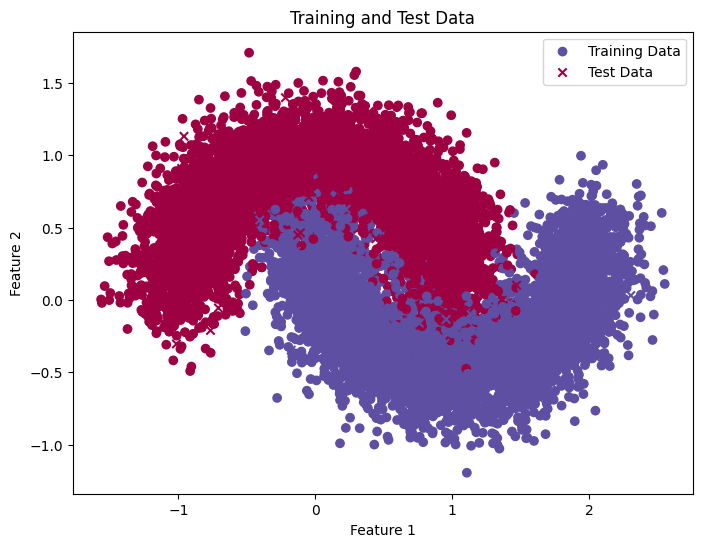

In [4]:
import numpy as np 
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

def tanh(z):
    return np.tanh(z)

def propagate(w, b, x, y):
    m = x.shape[1]
    A = tanh(np.dot(w.T, x) + b)
    cost = -1 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    dw = 1 / m * np.dot(x, (A - y).T)
    db = 1 / m * np.sum(A - y)
    cost = np.squeeze(cost)
    grads = {"dw": dw, "db": db}
    return grads, cost

def optimize(w, b, x, y, learning_rate, num_iterations, print_cost=True):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, x, y)
        dw = grads['dw']
        db = grads['db']
        w -= learning_rate * dw
        b -= learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
    return w, b, costs

def model(x_train, x_test, y_train, y_test, learning_rate=0.2, num_iterations=2000, print_cost=True):
    w, b = initialize_parameters(x_train.shape[0])
    w, b, costs = optimize(w, b, x_train, y_train, learning_rate, num_iterations, print_cost)
    return {"costs": costs, "w": w, "b": b, "learning_rate": learning_rate, "num_iterations": num_iterations}

# Generate data using make_moons
x_train, y_train = make_moons(n_samples=10000, noise=0.2, random_state=0)
x_test, y_test = make_moons(n_samples=200, noise=0.2, random_state=1)

# Reshape y_train and y_test
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

# Plot training and test data without decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train.squeeze(), cmap=plt.cm.Spectral, label='Training Data')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test.squeeze(), cmap=plt.cm.Spectral, marker='x', label='Test Data')
plt.title('Training and Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
